In [80]:
import pandas as pd
from mlbase.db import MLData, Table
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [ ]:
'''Берем только тех менеджеров из таблицы manager_result, которые работали с юрлицами (status = 'active')
Отметим, что менеджеры не всегда заполняли все поля

user_id - id менеджера
card-given - число сделок, закончившихся выдачей карт
client_deny - число сделок, закончившихся отказом клиента
appoint_made - число назначенных встреч
appoint_postponed - число отложенных встреч
road_map - число дорожных карт
error_data - ошибочные данные
potential - число сделок, в которых есть потенциал
to_deny - число сделок, от которых менеджер отказался
agreement_received - число полученных соглашений
return-task - число задач, которые были возвращены
overall - общее число выполненых и выполняемых задач
active - число активных задач
completed - число завершенных задач
postponed - число отложенных задач
declined - число отклоненных задач
new - число новых задач
in_progress - число обрабатываемых задач
'''


In [82]:
df = pd.read_sql('''select * from manager_result t1 inner join raw_3 t2 on t1.user_id = t2.id where t2.status = 'active' order by user_id''', db.engine)

In [83]:
pd.set_option('max_columns', None)
df.head()

,user_id,card_given,client_deny,appoint_made,appoint_postponed,road_map,error_data,potential,to_deny,agreement_received,return_task,overall,active,completed,postponed,declined,new,in_progress,id,role,role_id,created_at,updated_at,status,branch_id,office_id,city_id
0,16,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,None,13,6.0,7.0,NaN,NaN,None,None,16,ГО,4.0,2020-03-04 01:44:59,2021-05-21 14:28:53,active,55.0,296.0,173.0
1,18,NaN,2.0,92.0,2.0,1.0,NaN,NaN,NaN,NaN,None,99,2.0,95.0,2.0,NaN,None,None,18,Менеджер по продажам ЗП,1.0,2020-03-04 01:44:59,2021-05-21 14:28:53,active,55.0,NaN,173.0
2,19,NaN,NaN,358.0,5.0,80.0,NaN,2.0,NaN,NaN,None,452,4.0,443.0,5.0,NaN,None,None,19,Менеджер по продажам ЗП,1.0,2020-03-04 01:44:59,2021-05-21 14:28:53,active,55.0,296.0,173.0
3,20,NaN,NaN,198.0,1.0,194.0,NaN,19.0,NaN,NaN,None,419,7.0,411.0,1.0,NaN,None,None,20,Менеджер по продажам ЗП,1.0,2020-03-04 01:44:59,2021-05-21 14:28:53,active,55.0,296.0,173.0
4,21,NaN,NaN,235.0,NaN,55.0,NaN,NaN,NaN,NaN,None,293,NaN,293.0,NaN,NaN,None,None,21,Менеджер по продажам ЗП,1.0,2020-03-04 01:44:59,2021-05-21 14:28:53,active,55.0,295.0,173.0


In [84]:
df.columns

Index(['user_id', 'card_given', 'client_deny', 'appoint_made',
       'appoint_postponed', 'road_map', 'error_data', 'potential', 'to_deny',
       'agreement_received', 'return_task', 'overall', 'active', 'completed',
       'postponed', 'declined', 'new', 'in_progress', 'id', 'role', 'role_id',
       'created_at', 'updated_at', 'status', 'branch_id', 'office_id',
       'city_id'],
      dtype='object')

In [85]:
#Заполняем нулями пропуски

In [86]:
df[['card_given', 'client_deny', 'appoint_made',
       'appoint_postponed', 'road_map', 'error_data', 'potential', 'to_deny',
       'agreement_received', 'return_task', 'overall', 'active', 'completed',
       'postponed', 'declined', 'new', 'in_progress']] = df[['card_given', 'client_deny', 'appoint_made',
       'appoint_postponed', 'road_map', 'error_data', 'potential', 'to_deny',
       'agreement_received', 'return_task', 'overall', 'active', 'completed',
       'postponed', 'declined', 'new', 'in_progress']].fillna(0)

In [90]:
sum(df['client_deny'])/sum(df['completed'])

0.06774836543010711

In [88]:
df['client_deny_to_overall'] = df['client_deny']/df['overall']*100

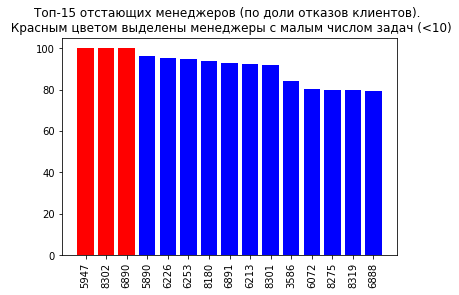

In [89]:
y = df.sort_values(by='client_deny_to_overall', ascending=False)['overall'][:15]
col = np.where(y<10, 'r', 'blue')
plt.bar(df.sort_values(by='client_deny_to_overall', ascending=False)['user_id'].astype('str')[:15], df.sort_values(by='client_deny_to_overall', ascending=False)['client_deny_to_overall'][:15], color=col)
plt.title('Топ-15 отстающих менеджеров (по доли отказов клиентов). \n Красным цветом выделены менеджеры с малым числом задач (<10)')
plt.xticks(rotation=90)
plt.show()

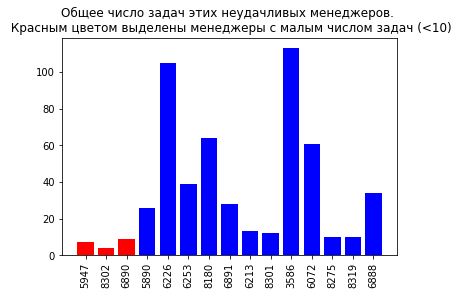

In [53]:
y = df.sort_values(by = 'client_deny_to_overall', ascending = False)['overall'][:15]
col = np.where(y < 10, 'r', 'blue')
plt.bar(df.sort_values(by='client_deny_to_overall', ascending=False)['user_id'].astype('str')[:15], df.sort_values(by='client_deny_to_overall', ascending=False)['overall'][:15], color=col)
plt.title('Общее число задач этих неудачливых менеджеров. \n Красным цветом выделены менеджеры с малым числом задач (<10)')
plt.xticks(rotation=90)
plt.show()

In [25]:
for k, v in zip(df.sort_values(by='client_deny_to_overall', ascending=False)['user_id'].astype('str')[:15], df.sort_values(by='client_deny_to_overall', ascending=False)['overall'][:15]):
    print(k, v)

8302 4
5947 7
6890 9
5890 26
6226 105
6253 39
8180 64
6891 28
6213 13
8301 12
3586 113
6072 61
8319 10
8275 10
6888 34


In [55]:
df['error_data_to_overall'] = df['error_data']/df['overall']*100

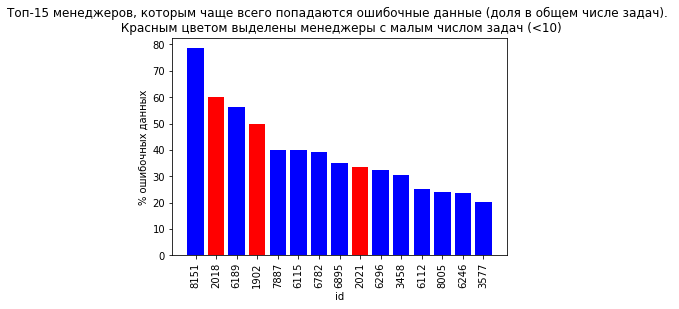

In [56]:
y = df.sort_values(by='error_data_to_overall', ascending=False)['overall'][:15]
col = np.where(y<10, 'r', 'blue')
plt.bar(df.sort_values(by='error_data_to_overall', ascending=False)['user_id'].astype('str')[:15], df.sort_values(by='error_data_to_overall', ascending=False)['error_data_to_overall'][:15], color=col)
plt.title('Топ-15 менеджеров, которым чаще всего попадаются ошибочные данные (доля в общем числе задач). \n Красным цветом выделены менеджеры с малым числом задач (<10)')
plt.xticks(rotation=90)
plt.xlabel('id')
plt.ylabel('% ошибочных данных')
plt.show()

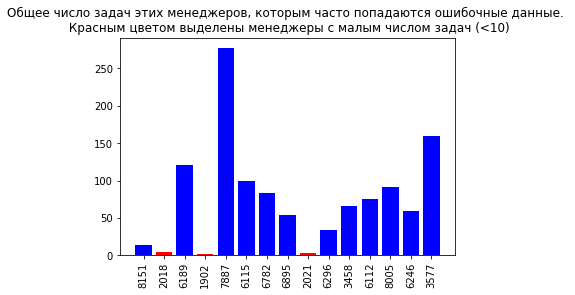

In [57]:
y = df.sort_values(by='error_data_to_overall', ascending=False)['overall'][:15]
col = np.where(y<10, 'r', 'blue')
plt.bar(df.sort_values(by='error_data_to_overall', ascending=False)['user_id'].astype('str')[:15], df.sort_values(by='error_data_to_overall', ascending=False)['overall'][:15], color=col)
plt.title('Общее число задач этих менеджеров, которым часто попадаются ошибочные данные. \n Красным цветом выделены менеджеры с малым числом задач (<10)')
plt.xticks(rotation=90)
plt.show()

In [58]:
#Почему у некоторых опытных менеджеров так часто попадаются ошибки в данных? Возможно, менеджер отлынивает от работы или скрывает свои неудачи

In [71]:
print('Менеджеры, у которых было более 10 задач и у которых ошибки в данных встречаются в >10% случаев')
df[df['error_data_to_overall']>=10][df['overall']>=10][['user_id', 'error_data_to_overall','error_data','overall']].sort_values(by = 'error_data_to_overall', ascending = False)

Менеджеры, у которых было более 10 задач и у которых ошибки в данных встречаются в >10% случаев


<ipython-input-71-4e437602a74d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['error_data_to_overall']>=10][df['overall']>=10][['user_id', 'error_data_to_overall','error_data','overall']].sort_values(by = 'error_data_to_overall', ascending = False)


,user_id,error_data_to_overall,error_data,overall
1192,8151,78.571429,11.0,14
727,6189,56.198347,68.0,121
1136,7887,40.072202,111.0,277
668,6115,40.000000,40.0,100
881,6782,39.285714,33.0,84
916,6895,35.185185,19.0,54
810,6296,32.352941,11.0,34
316,3458,30.303030,20.0,66
665,6112,25.333333,19.0,75
1184,8005,24.175824,22.0,91


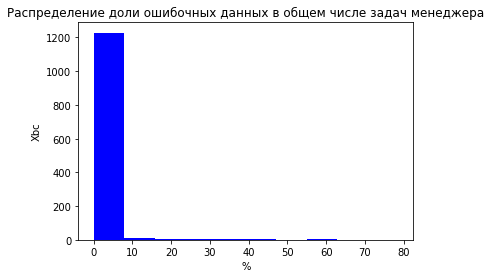

In [60]:
plt.title('Распределение доли ошибочных данных в общем числе задач менеджера')
plt.hist(df['error_data_to_overall'], color='b')
plt.xlabel('%')
plt.ylabel('Xbc')
plt.show()

In [65]:
#Находим доверительный интервал

In [66]:
def mean_confidence_interval(data, confidence=0.99):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    print('mean, min, max')
    return m, m-h, m+h

In [67]:
mean_confidence_interval(df['error_data_to_overall'][df.error_data_to_overall.notnull()])

mean, min, max


(0.8335700615201833, 0.47918566423055037, 1.1879544588098163)

In [73]:
df['to_deny_to_overall'] = df['to_deny']/df['overall']*100

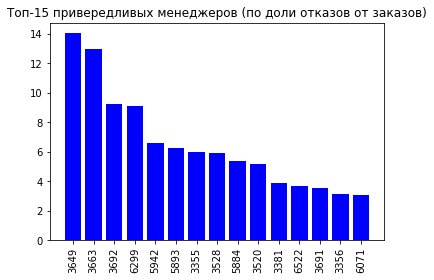

In [79]:
y = df.sort_values(by='to_deny_to_overall', ascending=False)['overall'][:15]
col = np.where(y<10, 'r', 'blue')
plt.bar(df.sort_values(by = 'to_deny_to_overall', ascending=False)['user_id'].astype('str')[:15], df.sort_values(by='to_deny_to_overall', ascending=False)['to_deny_to_overall'][:15], color=col)
plt.title('Топ-15 привередливых менеджеров (по доли отказов от заказов)')
plt.xticks(rotation=90)
plt.show()

In [100]:
#среди топ-15 нет новичков (по общему числу заказов). Возможно, такие 'вольности' позволяют себе только опытные менеджеры или они лучше предсказывают имеет ли смысл заниматься клиентом

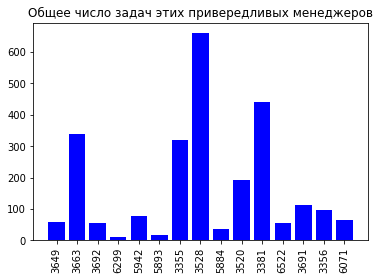

In [77]:
y = df.sort_values(by='to_deny_to_overall', ascending=False)['overall'][:15]
col = np.where(y<10, 'r', 'blue')
plt.bar(df.sort_values(by='to_deny_to_overall', ascending=False)['user_id'].astype('str')[:15], df.sort_values(by='to_deny_to_overall', ascending=False)['overall'][:15], color=col)
plt.title('Общее число задач этих привередливых менеджеров')
plt.xticks(rotation=90)
plt.show()

In [78]:
pd.set_option('display.max_columns', None)
df.head()

,user_id,card_given,client_deny,appoint_made,appoint_postponed,road_map,error_data,potential,to_deny,agreement_received,return_task,overall,active,completed,postponed,declined,new,in_progress,id,role,role_id,created_at,updated_at,status,branch_id,office_id,city_id,client_deny_to_overall,error_data_to_overall,to_deny_to_overall
0,16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,13,6.0,7.0,0.0,0.0,0,0,16,ГО,4.0,2020-03-04 01:44:59,2021-05-21 14:28:53,active,55.0,296.0,173.0,0.000000,0.0,0.0
1,18,0.0,2.0,92.0,2.0,1.0,0.0,0.0,0.0,0.0,0,99,2.0,95.0,2.0,0.0,0,0,18,Менеджер по продажам ЗП,1.0,2020-03-04 01:44:59,2021-05-21 14:28:53,active,55.0,NaN,173.0,2.020202,0.0,0.0
2,19,0.0,0.0,358.0,5.0,80.0,0.0,2.0,0.0,0.0,0,452,4.0,443.0,5.0,0.0,0,0,19,Менеджер по продажам ЗП,1.0,2020-03-04 01:44:59,2021-05-21 14:28:53,active,55.0,296.0,173.0,0.000000,0.0,0.0
3,20,0.0,0.0,198.0,1.0,194.0,0.0,19.0,0.0,0.0,0,419,7.0,411.0,1.0,0.0,0,0,20,Менеджер по продажам ЗП,1.0,2020-03-04 01:44:59,2021-05-21 14:28:53,active,55.0,296.0,173.0,0.000000,0.0,0.0
4,21,0.0,0.0,235.0,0.0,55.0,0.0,0.0,0.0,0.0,0,293,0.0,293.0,0.0,0.0,0,0,21,Менеджер по продажам ЗП,1.0,2020-03-04 01:44:59,2021-05-21 14:28:53,active,55.0,295.0,173.0,0.000000,0.0,0.0


In [65]:
#Строим корреляционную матрицу по выбранным фичам

In [68]:
df_cor = df[['overall', 'active','completed', 'new', 'return_task', 'to_deny', 'error_data', 'error_data_to_overall', 'client_deny_to_overall', 'to_deny_to_overall']]

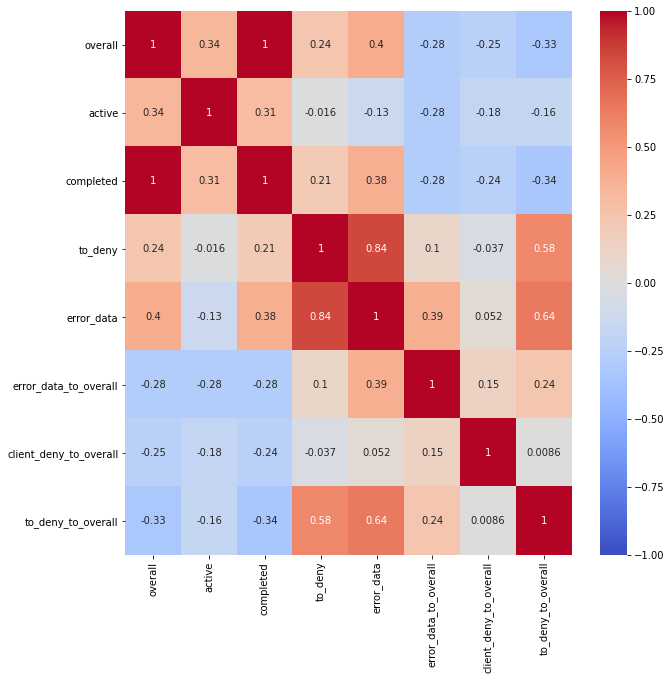

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cor.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.show()

In [ ]:
'''Из корреляционной матрицы видно, что:
-отрицательная корреляция overall и to_deny_to_overall -> чаще отказываются от заказов менеджеры с маленьким опытом (у которых было мало заказов всего)
-отрицательная корреляция client_deny_to_overall с overall и completed -> менее опытным менеджерам чаще отказывают
-отрицательная корреляция active и client deny_to_overall -> у менеджеров, которые берут сразу много заданий параллельно меньше отказов
'''